In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('correct_tiny_features.csv')

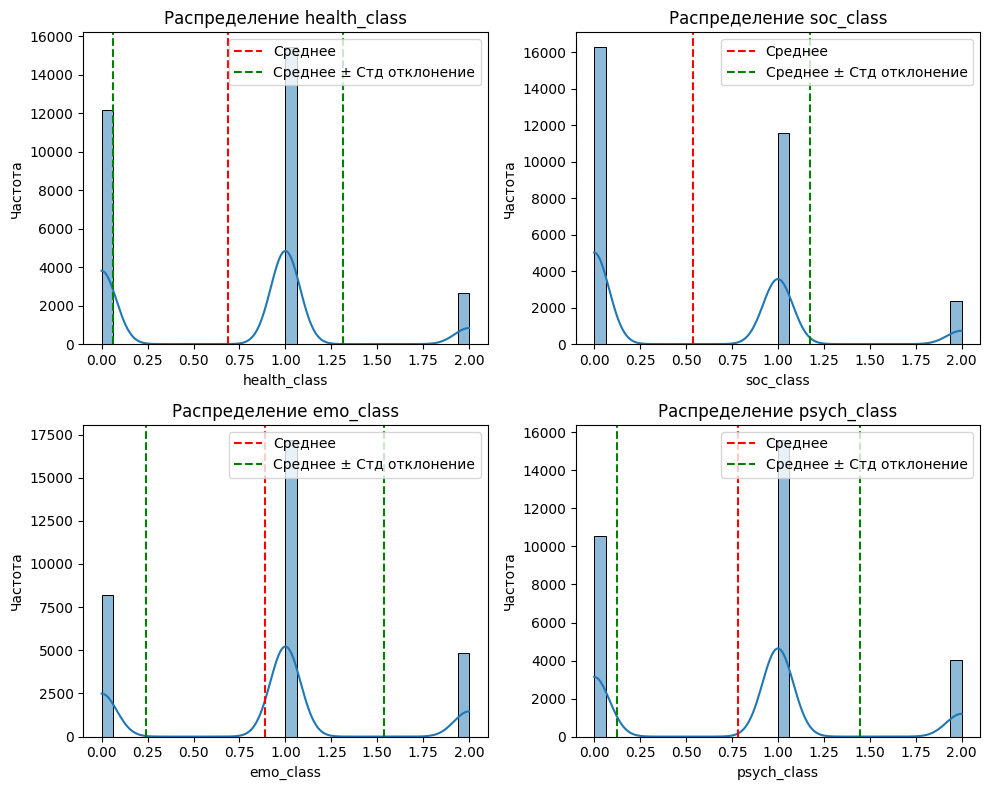

In [ ]:
columns = ['health_class', 'soc_class', 'emo_class', 'psych_class']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Проход по каждой колонке и создание графика
for i, column in enumerate(columns):
    # Распределение
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], multiple="stack")
    axes[i].set_title(f'Распределение {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')

    # Среднее значение и стандартное отклонение
    mean_val = df[column].mean()
    std_val = df[column].std()
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Среднее')
    axes[i].axvline(mean_val + std_val, color='green', linestyle='--', label='Среднее ± Стд отклонение')
    axes[i].axvline(mean_val - std_val, color='green', linestyle='--')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
pers_df = df[['user_id', 'health_class', 'soc_class', 'emo_class', 'psych_class']]
pers_df = pers_df.drop_duplicates()

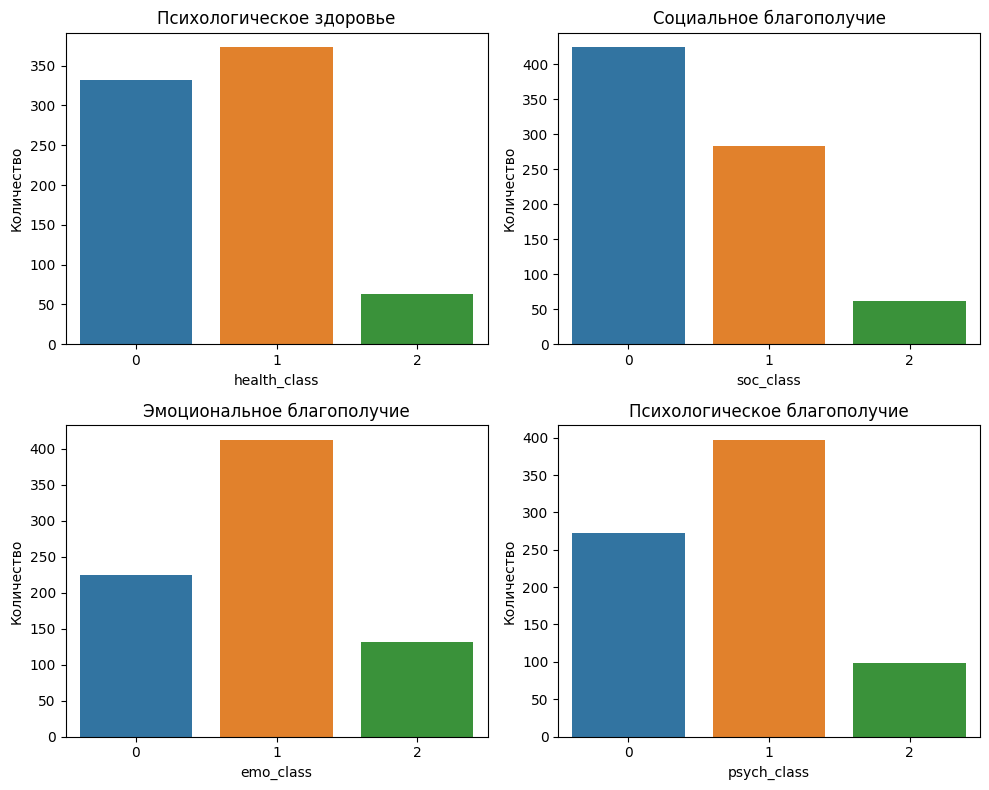

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Психологическое здоровье', 'Социальное благополучие', 'Эмоциональное благополучие', 'Психологическое благополучие']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(columns):
    sns.countplot(data=pers_df, x=column, ax=axes[i // 2, i % 2], )
    axes[i // 2, i % 2].set_title(cols[i])
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel('Количество')

plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
df['token_len'] = df.text.apply(lambda x:len(tokenizer.tokenize(x)))
df

Token indices sequence length is longer than the specified maximum sequence length for this model (730 > 512). Running this sequence through the model will result in indexing errors


,text,post_date,user_id,emo,soc,psych,health,emo_class,soc_class,psych_class,...,indicative_mood_num,imperative_mood_num,imperfect_verbs_num,perfect_verbs_num,past_tense_verb_num,present_tense_verb_num,future_tense_verb_num,expressives,char_len,token_len
0,Я смеялся до слёз. Пародия про каникулы презид...,2020,856,3.666667,0.8,2.833333,2.285714,1,0,1,...,1,0,1,0,1,0,0,0,51,17
1,"Торт ""Наполеон"" на сковороде Готовится, быстро...",2020,856,3.666667,0.8,2.833333,2.285714,1,0,1,...,1,0,1,0,0,1,0,0,80,23
2,Красотень!,2020,861,2.666667,0.4,1.500000,1.357143,1,0,0,...,0,0,0,0,0,0,0,1,10,4
3,Продлить выплаты в 10000 тыс.рублей на детей д...,2020,861,2.666667,0.4,1.500000,1.357143,1,0,0,...,0,1,0,2,0,0,0,0,118,33
4,Единовременная выплата 10000 на каждого ребенк...,2020,861,2.666667,0.4,1.500000,1.357143,1,0,0,...,0,1,0,1,0,0,0,0,90,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30226,Live,2019,7329,1.000000,2.8,2.166667,2.142857,0,1,0,...,0,0,0,0,0,0,0,0,4,1
30227,Новости -Духовная семинария встретила праздник...,2019,7329,1.000000,2.8,2.166667,2.142857,0,1,0,...,1,0,0,1,1,0,0,0,64,15
30228,Божественная литургия на греческом языке стала...,2019,7329,1.000000,2.8,2.166667,2.142857,0,1,0,...,1,0,0,1,1,0,0,0,109,28
30229,"очередной наш выпуск ""ответ семинариста""😊",2019,7329,1.000000,2.8,2.166667,2.142857,0,1,0,...,0,0,0,0,0,0,0,0,41,9


In [ ]:
# Вычисление 95-го перцентиля для колонки 'token_len'
percentile_95 = df['token_len'].quantile(0.95)

print(f"95-й перцентиль колонки 'token_len': {percentile_95}")


95-й перцентиль колонки 'token_len': 530.0
